In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('FnB_hackathon_Pi.csv')

In [34]:
df.head()
#modified the database in such a way that we calculated profit percentage so we can compare it with months.
#profit percentage=(commission/revenue)*100

,YEAR,MONTH,Company,Area 1,Area 2,Area 3,Area 3 Classification,Outlet Type,Outlet Name,Product Category 1,Product Category 2,Product,Units_sold,Revenue,Commission,Profit_percentage
0,2018,4,white walkers,beyond the wall,deepwood motte,lhazareen,ser,house humble,viserys ii targaryen,mexican,jack,jerk seasoning,2.504949,0.0,0.0,0
1,2018,6,white walkers,the stormlands,oxcross,westerman,lord of the crossing,house webber,viserys ii targaryen,mexican,jack,stone-ground cornmeal,2.521447,0.0,0.0,0
2,2018,6,white walkers,the north,moat cailin,lyseni,ser,night's watch,viserys ii targaryen,mexican,jack,prosecco,17.529592,0.0,0.0,0
3,2018,3,white walkers,the north,moat cailin,summer isles,greenstone,night's watch,yohn farwynd,mexican,jack,jerk seasoning,4.992767,0.0,0.0,0
4,2018,3,white walkers,the riverlands,darry,northmen,queen,house osgrey,viserys ii targaryen,mexican,jack,stone-ground cornmeal,7.494240,0.0,0.0,0


In [35]:
X = df[['Revenue','Commission','Units_sold']]


In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=1)

In [38]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
print(pca.explained_variance_ratio_)

[0.99860002]


In [40]:
y = pca.transform(X)

In [41]:
y.size

1048575

In [42]:
X['Revenue'].size

1048575

In [43]:
df['PCA val'] = y

In [44]:
df.head()

,YEAR,MONTH,Company,Area 1,Area 2,Area 3,Area 3 Classification,Outlet Type,Outlet Name,Product Category 1,Product Category 2,Product,Units_sold,Revenue,Commission,Profit_percentage,PCA val
0,2018,4,white walkers,beyond the wall,deepwood motte,lhazareen,ser,house humble,viserys ii targaryen,mexican,jack,jerk seasoning,2.504949,0.0,0.0,0,-211140.147664
1,2018,6,white walkers,the stormlands,oxcross,westerman,lord of the crossing,house webber,viserys ii targaryen,mexican,jack,stone-ground cornmeal,2.521447,0.0,0.0,0,-211140.147661
2,2018,6,white walkers,the north,moat cailin,lyseni,ser,night's watch,viserys ii targaryen,mexican,jack,prosecco,17.529592,0.0,0.0,0,-211140.145142
3,2018,3,white walkers,the north,moat cailin,summer isles,greenstone,night's watch,yohn farwynd,mexican,jack,jerk seasoning,4.992767,0.0,0.0,0,-211140.147246
4,2018,3,white walkers,the riverlands,darry,northmen,queen,house osgrey,viserys ii targaryen,mexican,jack,stone-ground cornmeal,7.494240,0.0,0.0,0,-211140.146826


In [45]:
from mpl_toolkits.mplot3d import Axes3D

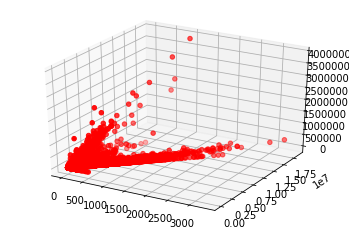

In [46]:
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Units_sold'],df['Revenue'],df['Commission'],c='r',marker='o')
plt.show()

In [47]:
ll = df[['Units_sold','Commission']]
lp = df['Revenue']  

In [48]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(ll, lp, test_size = 0.20) 

In [49]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()  
lr.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
pred = lr.predict(X_test)

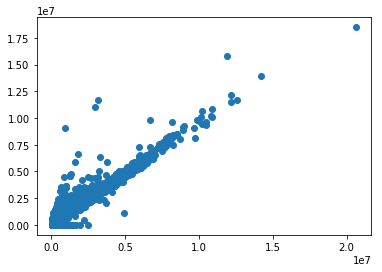

In [55]:
plt.scatter(pred,y_test)
#Linear regression 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


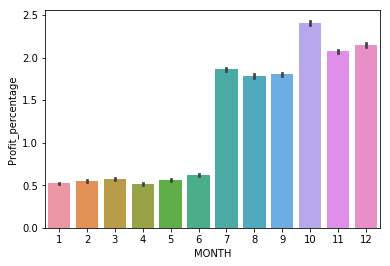

In [4]:
sns.barplot(x=df['MONTH'], y=df['Profit_percentage'])

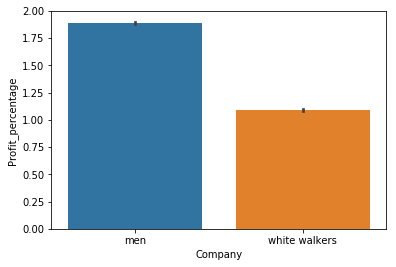

In [5]:
sns.barplot(x=df['Company'], y=df['Profit_percentage'])